In [90]:
#Lucas Ross 14 Mar 2023

#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [91]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

df = pd.read_csv("salaries.csv")
df.head(5) #target variable = "salary_more_then_100k"

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [92]:
#one-hot encode job and degree and company
company = pd.get_dummies(df["company"])
job = pd.get_dummies(df["job"])
degree = pd.get_dummies(df["degree"])

df.drop(["company", "job", "degree"], axis=1, inplace=True)
df = pd.concat([df, company, job, degree], axis=1)
df.head(5)


,salary_more_then_100k,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,1,0,1
2,1,0,0,1,1,0,0,1,0
3,1,0,0,1,1,0,0,0,1
4,0,0,0,1,0,1,0,1,0


In [93]:
#set up x and y and split data
x = df.drop(["salary_more_then_100k"], axis=1)
y = df["salary_more_then_100k"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [94]:
#make a model and fit to data
model = tree.DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [95]:
model.score(xtrain, ytrain)

1.0

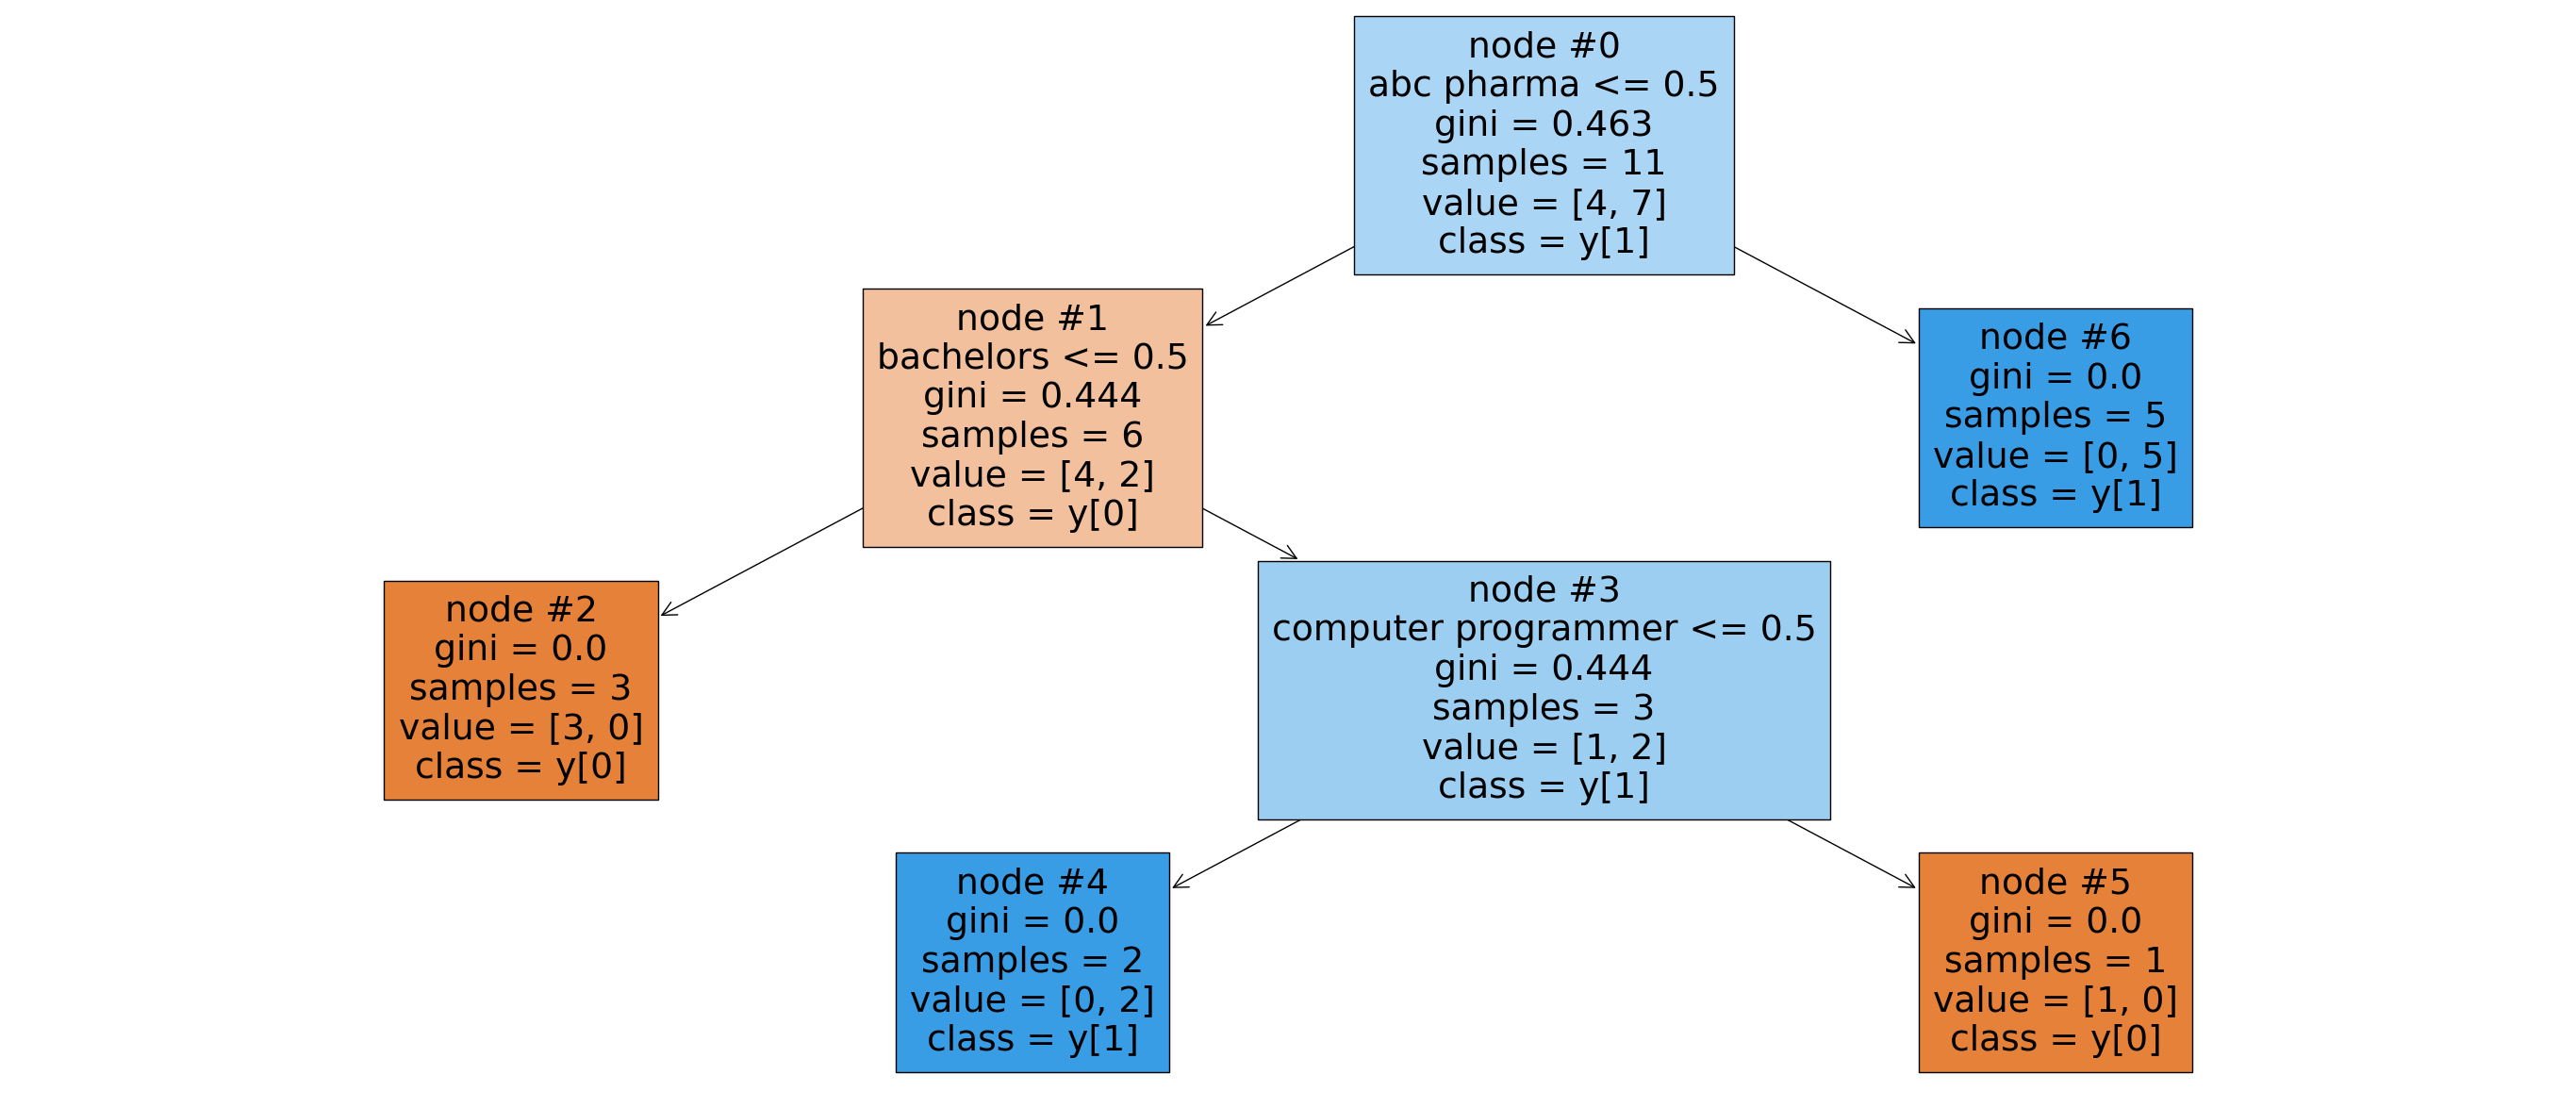

In [96]:
plt.figure(figsize=(35, 15))
tree= tree.plot_tree(model,
    feature_names=df.columns,
    node_ids=True,
    class_names=True,
    filled=True)